<a href="https://colab.research.google.com/github/DrStephPowers/MGMT-in-Python/blob/main/Capacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Capacity Planning

In [38]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [39]:
Year = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)

In [40]:
Patient = (3400, 4100, 3800, 4235, 5890, 5080, 6367, 6552, 7436, 6980)

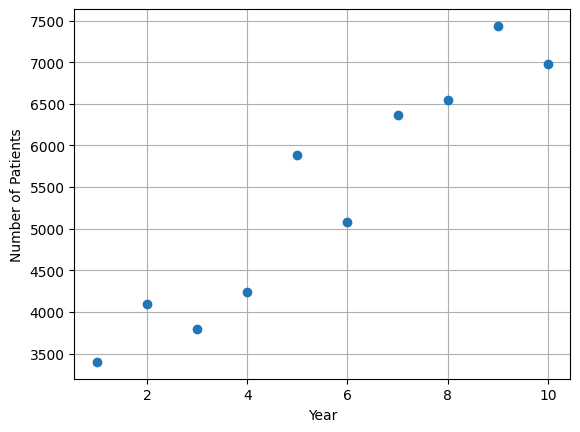

In [42]:
plt.plot(Year, Patient, marker='o', linestyle="none" )
plt.xlabel('Year')
plt.ylabel('Number of Patients')
plt.grid()
plt.show()

In [43]:
Year = np.array(Year).reshape((-1, 1))
Patient = np.array(Patient)

In [44]:
model = LinearRegression().fit(Year, Patient)

In [47]:
model.coef_

array([454.04848485])

In [48]:
model.intercept_

2886.733333333333

Patient = 2886.73 + 454.05 (Year)

In [46]:
model.score(Year,Patient)

0.9022414446396151

In [49]:
x = np.array([11, 12, 13, 14]).reshape((-1, 1))

In [51]:
y = model.predict(x)

In [52]:
y

array([7881.26666667, 8335.31515152, 8789.36363636, 9243.41212121])

Production time per unit is 0.5 hours.
Surgery suites can be used 40 hours a week, 52 weeks a year. How many surgical suites does the hospital need? Can we get by with 2 surgical suites?

In [54]:
(y * 0.5) / (40 * 52)

array([1.89453526, 2.00368153, 2.1128278 , 2.22197407])

## Bottlenecks Impact Capacity

In [55]:
def Capacity(a, b, c, d):
  Meat = (200 / 4)*(1 + a)
  Veg = 25 * (1 + b)
  Bread = (24 / 4) * (1 + c)
  Assemble = (60 / 5) * (1 + d)
  return min(Meat, Veg, Bread, Assemble)

In [56]:
Capacity(1,1,1,1)

12.0

In [61]:
Capacity(1,1,0.30,1)

7.800000000000001

In [62]:
Capacity(0.15, 1, 1, 1)

12.0

In [63]:
Capacity(1, 1, 1, 0.20)

12.0

## Breakeven Analysis

In [6]:
def Break_even(FC, v, R):
    BE = FC / (R-v)
    return BE

In [7]:
Break_even(40000, 10, 15)

8000.0

In [8]:
Break_even(30000, 12, 16)

7500.0

In [9]:
def profit(FC, v, R, Q):
  TR = Q * R
  TC = FC + (v * Q)
  prof = TR - TC
  return prof

In [12]:
profit(40000, 10, 15, 17000)

45000

In [13]:
profit(30000, 12, 16, 17000)

38000

In [35]:
Q = []
profita = []
profitb = []

In [36]:
for i in range(0, 22000, 2000):
  Q.append(i)
  a = profit(40000, 10, 15, i)
  profita.append(a)
  b = profit(30000, 12, 16, i)
  profitb.append(b)

In [14]:
import matplotlib.pyplot as plt

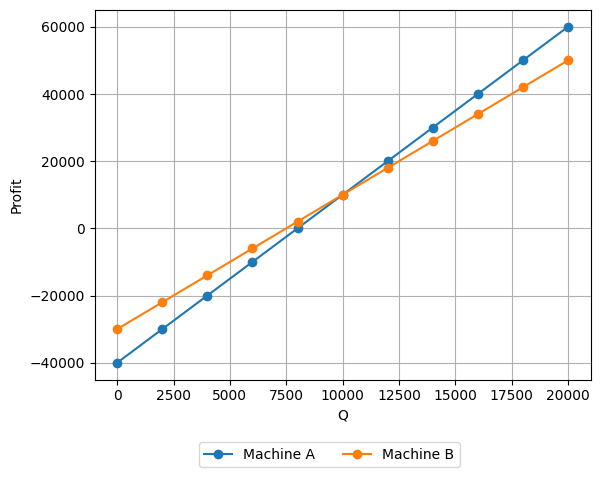

In [37]:
plt.plot(Q, profita, marker='o')
plt.plot(Q, profitb, marker='o')
plt.xlabel('Q')
plt.ylabel('Profit')
plt.legend(["Machine A", "Machine B"], bbox_to_anchor=(0.75, -0.15), ncol=2)
plt.grid()
plt.show()